In [ ]:
# Install necessary libraries
!pip install pandas numpy scipy matplotlib statsmodels

# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:
!ls data/


In [ ]:
!unzip -l data1.zip


Archive:  data1.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data1.zip or
        data1.zip.zip, and cannot find data1.zip.ZIP, period.


In [ ]:
!mkdir -p data
!unzip -o data1.zip -d data/
!unzip -o data2.zip -d data/
!unzip -o data3.zip -d data/


Archive:  data1.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data1.zip or
        data1.zip.zip, and cannot find data1.zip.ZIP, period.
Archive:  data2.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data2.zip or
        data2.zip.zip, and cannot find data2.zip.ZIP, period.
Archive:  data3.zip
  inflating: data/data/grouplevelanalysis_final.dta  
  inflating: data/data/matchedCPS_1979_2016.dta  
  inflating: data/data/state_panels_with3quant1979.dta  
  inflating: data/data/

In [ ]:
import pandas as pd

file_path = 'data/data/grouplevelanalysis_final.dta'
df = pd.read_stata(file_path)
print(df.head())  # Display the first few rows to verify it's loaded correctly


   statenum  quarterdate  wagebins  year  count  hsdcount  hsd40count  \
0         1           76       100  1979    0.0       0.0         0.0   
1         1           77       100  1979    0.0       0.0         0.0   
2         1           78       100  1979    0.0       0.0         0.0   
3         1           79       100  1979    0.0       0.0         0.0   
4         1           80       100  1980    0.0       0.0         0.0   

   hsd0020count  hsd6099count  hsd2030count  ...  wtsc30401979  wtsc40501979  \
0           0.0           0.0           0.0  ...  70616.132812  32950.292969   
1           0.0           0.0           0.0  ...  90348.156250  51595.339844   
2           0.0           0.0           0.0  ...  60138.613281  62602.214844   
3           0.0           0.0           0.0  ...  81295.664062  35886.796875   
4           0.0           0.0           0.0  ...  64027.406250  37246.117188   

   wtsc50601979  wtsc60991979  wtcoll00201979  wtcoll20301979  wtcoll30401979  \

In [ ]:
print(df.columns)


Index(['statenum', 'quarterdate', 'wagebins', 'year', 'count', 'hsdcount',
       'hsd40count', 'hsd0020count', 'hsd6099count', 'hsd2030count',
       ...
       'wtsc30401979', 'wtsc40501979', 'wtsc50601979', 'wtsc60991979',
       'wtcoll00201979', 'wtcoll20301979', 'wtcoll30401979', 'wtcoll40501979',
       'wtcoll50601979', 'wtcoll60991979'],
      dtype='object', length=667)


In [ ]:
import statsmodels.api as sm


In [ ]:
# Assuming 'count' is the dependent variable and 'hsdcount' & 'hsd40count' are independent variables
X = df[['hsdcount', 'hsd40count']]
y = df['count']

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                 1.639e+05
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        08:18:59   Log-Likelihood:            -1.0924e+07
No. Observations:              906984   AIC:                         2.185e+07
Df Residuals:                  906981   BIC:                         2.185e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6551.9432     45.017    145.543      0.0

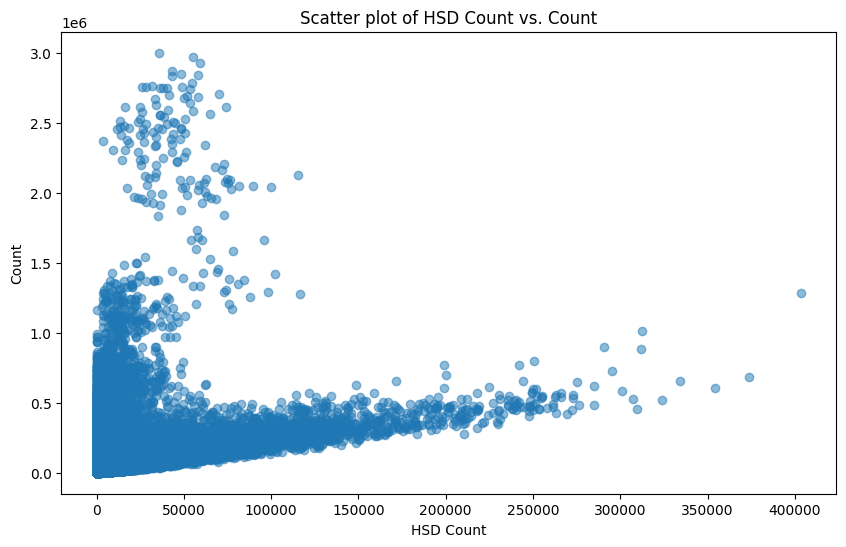

In [ ]:
import matplotlib.pyplot as plt

# Example: Scatter plot of 'hsdcount' vs. 'count'
plt.figure(figsize=(10, 6))
plt.scatter(df['hsdcount'], df['count'], alpha=0.5)
plt.title('Scatter plot of HSD Count vs. Count')
plt.xlabel('HSD Count')
plt.ylabel('Count')
plt.show()


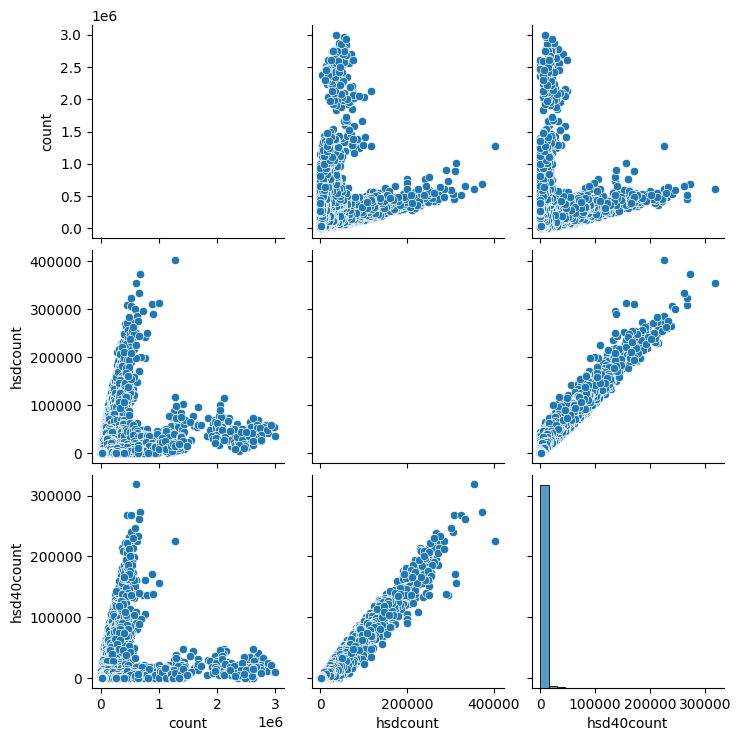

In [ ]:
import seaborn as sns

# Selecting a subset of variables for clarity
subset_df = df[['count', 'hsdcount', 'hsd40count']]

# Creating a pairplot
sns.pairplot(subset_df)
plt.show()


In [ ]:

latex_table = df.head().to_latex(index=False)  # Convert the first few rows to LaTeX
print(latex_table)


<ipython-input-38-54f542a0f39e>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.head().to_latex(index=False)  # Convert the first few rows to LaTeX


\begin{tabular}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrlrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
 statenum &  quarterdate &  wagebins &  year &  count &  hsdcount &  hsd40count &  hsd0020count &  hsd6099count &  hsd2030count &  hsd3040count &  hsd4050count &  hsd5060count &  hsgcount &  hsg0020count &  hsg6099count &  hsg2030count &  hsg3040count &  hsg4050count &  hsg5060count &  sccount &  sc0020co

In [ ]:
!unzip dofiles.zip -d dofiles/


Archive:  dofiles.zip
   creating: dofiles/dofiles/
  inflating: dofiles/dofiles/state_panels_cents_balanced_QJE.do  
  inflating: dofiles/dofiles/measurement_error_calculation_all_CPS_QJE.do  
  inflating: dofiles/dofiles/Appendix_Figure_F4.do  
  inflating: dofiles/dofiles/clean_admin_cps_workingdata_allind_5cents.do  
  inflating: dofiles/dofiles/Appendix_Figure_C2.do  
  inflating: dofiles/dofiles/Table4_for_QJE.do  
  inflating: dofiles/dofiles/fulltimeequivalent.do  
  inflating: dofiles/dofiles/clean_admin_cps_workingdata_allind_5cents_nominal.do  
  inflating: dofiles/dofiles/Appendix_Tables_G3_G4_G7_add.do  
  inflating: dofiles/dofiles/Appendix_Table_A1_A2_demog.do  
  inflating: dofiles/dofiles/Appendix_Table_A1_A2_CK.do  
  inflating: dofiles/dofiles/deconvolution_QJE.R  
  inflating: dofiles/dofiles/Figure6_for_QJE.do  
  inflating: dofiles/dofiles/Figure8_CKgroups_est.do  
  inflating: dofiles/dofiles/Table1_last_column_for_QJE.do  
  inflating: dofiles/dofiles/CK_predict

In [52]:
import zipfile
import os

# Corrected path to the ZIP file
zip_path = '/content/dofiles.zip'
extract_dir = '/mnt/data/dofiles'  # Directory to extract the contents to

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Attempt to extract the ZIP file again
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print("Extraction successful.")
except FileNotFoundError:
    print(f"File not found: {zip_path}")


Extraction successful.
